**Exploritory Data Analysis of Hospital Readmissions and Home Health Care Part II**
***
After my initial EDA and story telling review, I wanted to see if more observations may significantly alter my initial findings.<br>
As such, the data was recleaned to contain observations for hospital readmissions and home health care agency ratings regrouped by zipcode..<br>
These larger datasets will be pulled in and explored to see what matches my initial findings, and what does not. 

In [1]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Making My Plots Pretty
sns.set()

In [3]:
# Importing DataFrame for EDA
df = pd.read_csv('final_by_zip.csv', index_col = 0)
df.head()

,zip,state,excessive_count,readmission_ratio,predicted_rate,expected_rate,nursing_care,physical_therapy,occupational_therapy,pathology_services,...,move_buff,in_out_bed_buff,bathing_buff,move_pain_debuff,breathing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,readmit_expectation,er_admit_expectation
0,36207,AL,6,1.047880,16.460000,15.960000,1,1.0,1.0,1.0,...,75.4,67.8,77.9,81.9,79.10,64.2,17.1,10.6,1,2
1,35611,AL,4,0.943800,15.066667,15.816667,1,1.0,1.0,1.0,...,78.7,70.9,77.9,75.7,76.90,67.8,15.0,15.1,1,1
2,36535,AL,2,1.025950,15.150000,14.950000,1,1.0,1.0,1.0,...,70.7,66.9,71.0,69.9,73.70,58.0,18.5,13.9,1,1
3,35501,AL,3,1.043575,15.775000,14.900000,1,1.0,1.0,1.0,...,74.1,77.3,68.7,72.8,77.15,63.7,15.8,10.6,2,2
4,36461,AL,2,0.941740,15.360000,16.280000,1,1.0,1.0,1.0,...,69.0,69.9,70.8,75.8,67.30,53.2,11.5,11.7,2,2


***
Now that we've imported the data.  I would like to take a look at some histograms.<br>
In particular I would like to review the readmission ratios and star ratings, similar to what was done in Part I.

In [4]:
# Compute Bins for Each Dataframe

data = len(df.state)
bins= int(np.sqrt(data))
print('Histogram Bins: ',bins)


Histogram Bins:  28


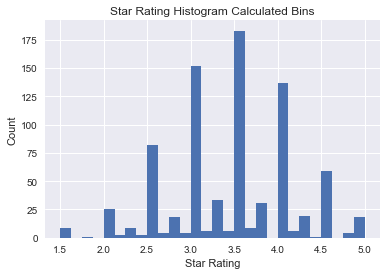

In [5]:
# Plotting Star Rating Histogram
_ = plt.hist(df.star_rating, bins=bins)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
_ = plt.title('Star Rating Histogram Calculated Bins')
plt.show()

Using the squre root rule of thumb, the bins appear to be separated by gaps.  I will try Matplotlib's default settings to contrast and compare.

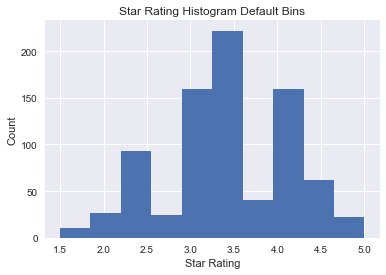

In [6]:
# Plotting Star Rating Histogram with Default Binning
_ = plt.hist(df.star_rating)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
_ = plt.title('Star Rating Histogram Default Bins')
plt.show()

Very interesting!  There appears to be few agencies rated between a 2.5 and a 3 as well as 3.5 and 4.  Furthermore, this histogram appears as though it is likely normally distributed.

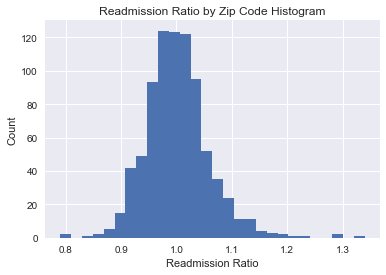

In [7]:
# Plotting Readmission Ratio Histogram
_ = plt.hist(df.readmission_ratio, bins=bins)
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('Count')
_ = plt.title('Readmission Ratio by Zip Code Histogram')
plt.show()

A lot more variability and yet another apparent normal distribution.  This is very exciting, and it is starting to look like my hypothesis that more observations were needed may be accurate. 

***
I was able to obtain additional expectation data for each home health care agency indicating how an agency met expectations for ER admissions and readmissions.  Before comparing this data to other measures, I would like to create a couple bar charts to see the counts for each category, and how they compare to one another.

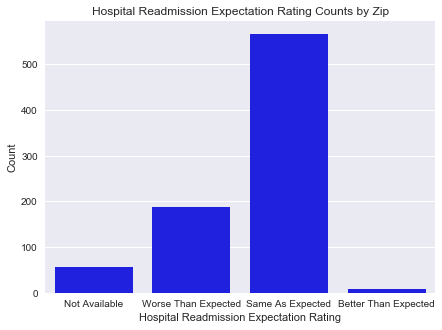

In [8]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'readmit_expectation', data=df, color = 'blue')
_ = plt.xlabel('Hospital Readmission Expectation Rating')
_ = plt.ylabel('Count')
_ = plt.title('Hospital Readmission Expectation Rating Counts by Zip')
ratings = ['Not Available', 'Worse Than Expected','Same As Expected','Better Than Expected']
plt.xticks(np.arange(4),ratings)

plt.show()

As we can see, the majority of home health care facilities rated as "Same as Expected" for hospital readmissions.<br>
It is surprising to see so few "Better than Expected" ratings.

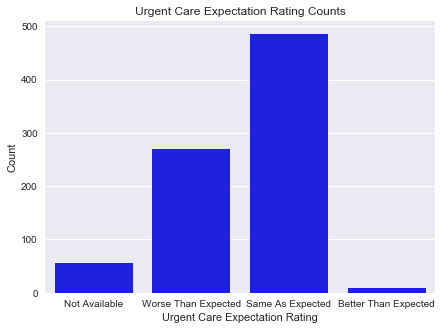

In [9]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'er_admit_expectation', data=df, color = 'blue')
_ = plt.xlabel('Urgent Care Expectation Rating')
_ = plt.ylabel('Count')
_ = plt.title('Urgent Care Expectation Rating Counts')
plt.xticks(np.arange(4),ratings)

plt.show()

Like the hospital readmission expectation ratings, the majority seem to be "Same as Expected", very few appear to be "Better than Expected", and there is a larger amount of "Worse than Expected" as compared to hospital readmissions.

***
Each state now has multiple observations.  I would like to see how the states compare to one another by building a violin plot.

In [10]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
meltme1 = df[['state','readmission_ratio']]
melted_readmit = pd.melt(meltme1, id_vars='state')
melted_readmit.columns=('state','category','ratio')

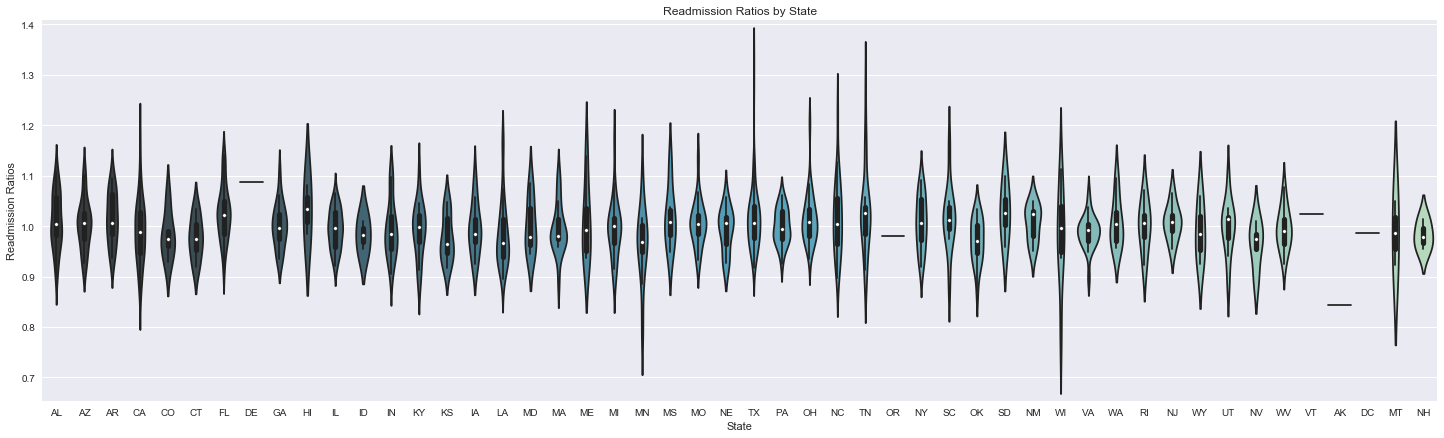

In [11]:
# Creating Violin Plot of States and their Readmission Ratios
plt.subplots(0,figsize=(25,7))
_= sns.violinplot(x='state', y='ratio', data=melted_readmit, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Readmission Ratios')
_ = plt.title('Readmission Ratios by State')
plt.margins(.02)
plt.show()


There is a lot of information to unpack here.  As expected, and observed in the grouped state data, most state mean ratios hover close to 1.0.  However, there is a lot of variability between states, with a few states having the majority of their readmission ratios below the excessive readmisison ratio indicator of 1.0.<br><br>
Ultimately, this graph unlocks a slew of questions we could ask.  For example:<br>
-   Does state population play a role in readmission ratio?<br>
-   What causes the variablility in state readmission ratios?<br>
-   What qualities do lower ratio states have different from higher ratio states? What do they have in common?

In [12]:
# Creating New Dataframe of Star Ratings and State by Melting Dataframe and Filtering Star Rating
melted_star = pd.melt(df, id_vars='state')
star_rate = melted_star[melted_star.variable =='star_rating']
star_rate.columns=('state','category','rating')

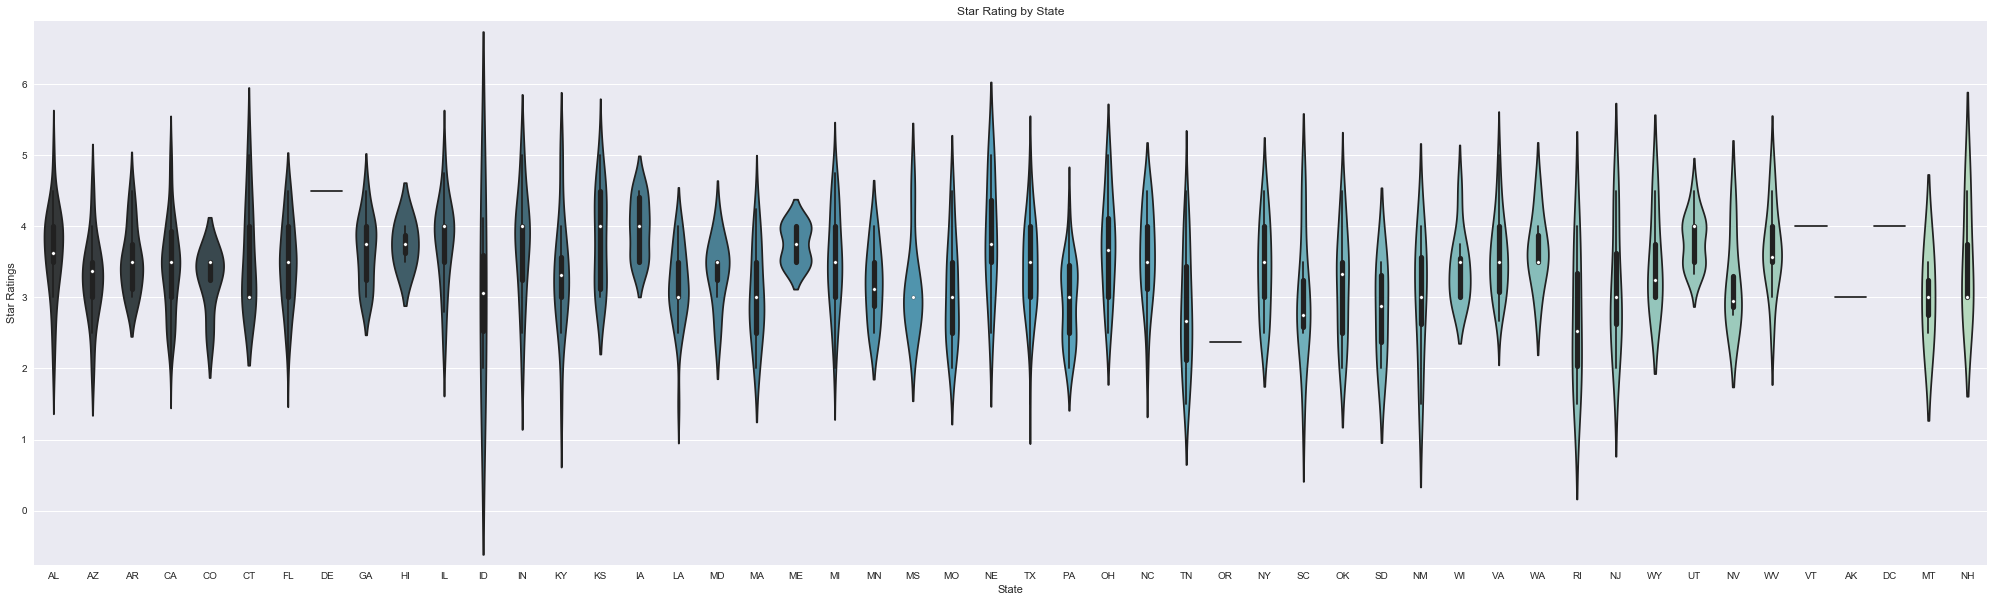

In [13]:
# Create Violin Plot of States and their Star Ratings
plt.subplots(0,figsize=(35,10))
_= sns.violinplot(x='state', y='rating', data=star_rate, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Star Ratings')
_ = plt.title('Star Rating by State')
plt.margins(.02)
plt.show()


Another fascinating plot!  There appears to be a lot more variability within the states overall.  At first glance it appears as though we might find a relationship between readmission ratios and star ratings this time!<br><br>
Similar to our first violin plot, we have more questions to ask.  For example:<br>
-   What qualities contribute to a higher star rating?<br>
-   How does star rating effect excessive readmissions?<br>
-   What qualities do higher star rated states have differnt from lower star rated states?  What do they have in common?

While the violin plots generate some interesting questions, the client we are focusing on is a health care provider or a home health care provider.  As such, our strategy is to focus more on the question of how home health care be improved to assist in reducing hospital readmissions.

***
Similar to Part I, let's now take a look at the variablity of each measure by creating some box plots.

In [14]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
categories = df.drop(['zip','state','excessive_count','readmission_ratio','predicted_rate','expected_rate','nursing_care',
                      'physical_therapy','occupational_therapy','pathology_services','medical_soc_services','home_health_aid',
                      'star_rating','readmit_expectation','er_admit_expectation'], axis=1)
hhc_melt = pd.melt(categories)
hhc_melt.columns=('category','rating')

# Save Default Plot Parameters
inline_rc = dict(plt.rcParams)

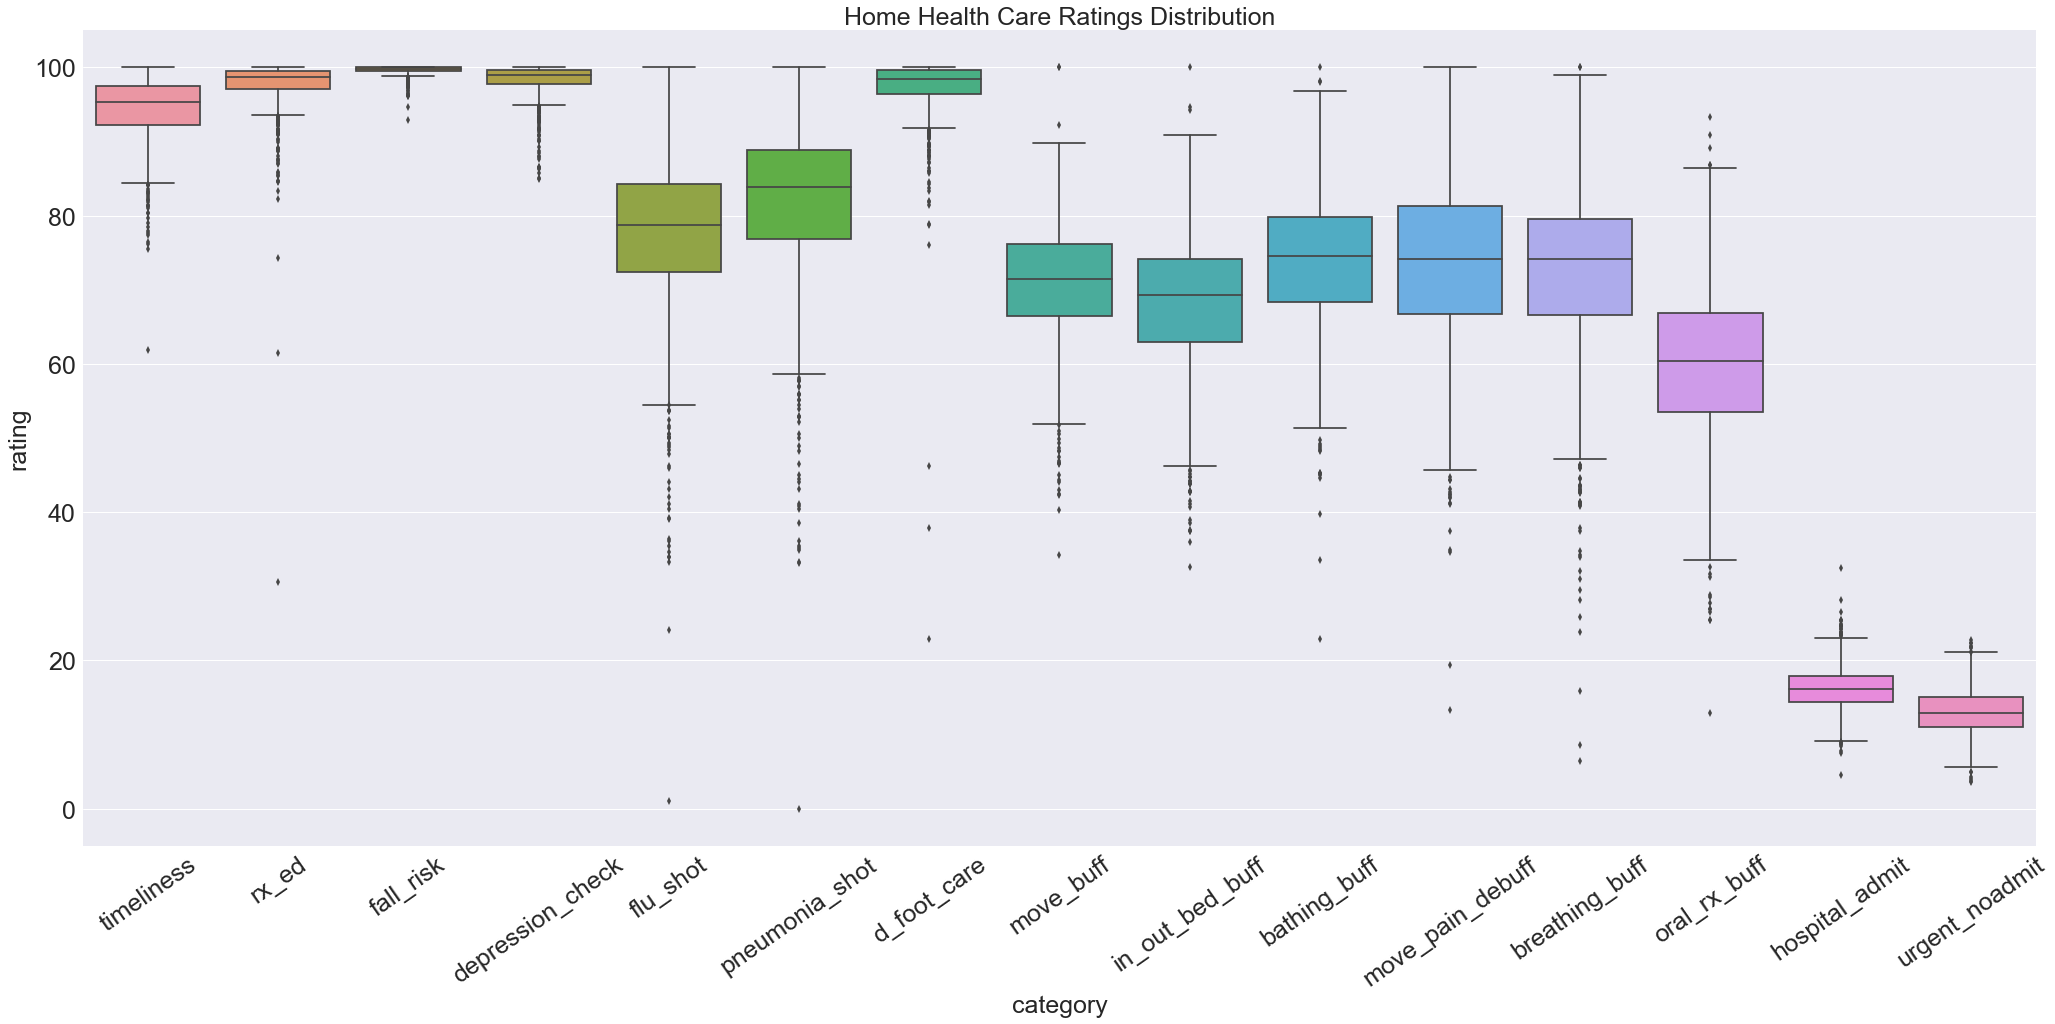

In [16]:
# Plot Box Plots for All Categories to Show Relative Variation
plt.subplots(0,figsize=(35,15))
_=sns.boxplot(x='category',y='rating',data=hhc_melt)
_= plt.title('Home Health Care Ratings Distribution')
_ = plt.rc('xtick', labelsize=25)
_ = plt.rc('axes', titlesize=25, labelsize=25)
_ = plt.rc('ytick', labelsize=25)
_ = plt.xticks(rotation = 35)
plt.show()

As expected, these categories have a lot more variability than the previous model.  However, there still appears to be a fairly high amount of outliers.  After reviewing the data, there are no footnotes advising that the outliers were calculated using a different metric. Since the extreme outliers were cleaned out in the cleaning process, I will move forward assuming these outliers reflect real values.

***
Now let's take a look at the correlations within the data.

In [17]:
# Create Dictionary for Heatmap Font Sizes
heatmap = {'xtick.labelsize':20, 'ytick.labelsize':20,'axes.titlesize':25, 'axes.labelsize':25}


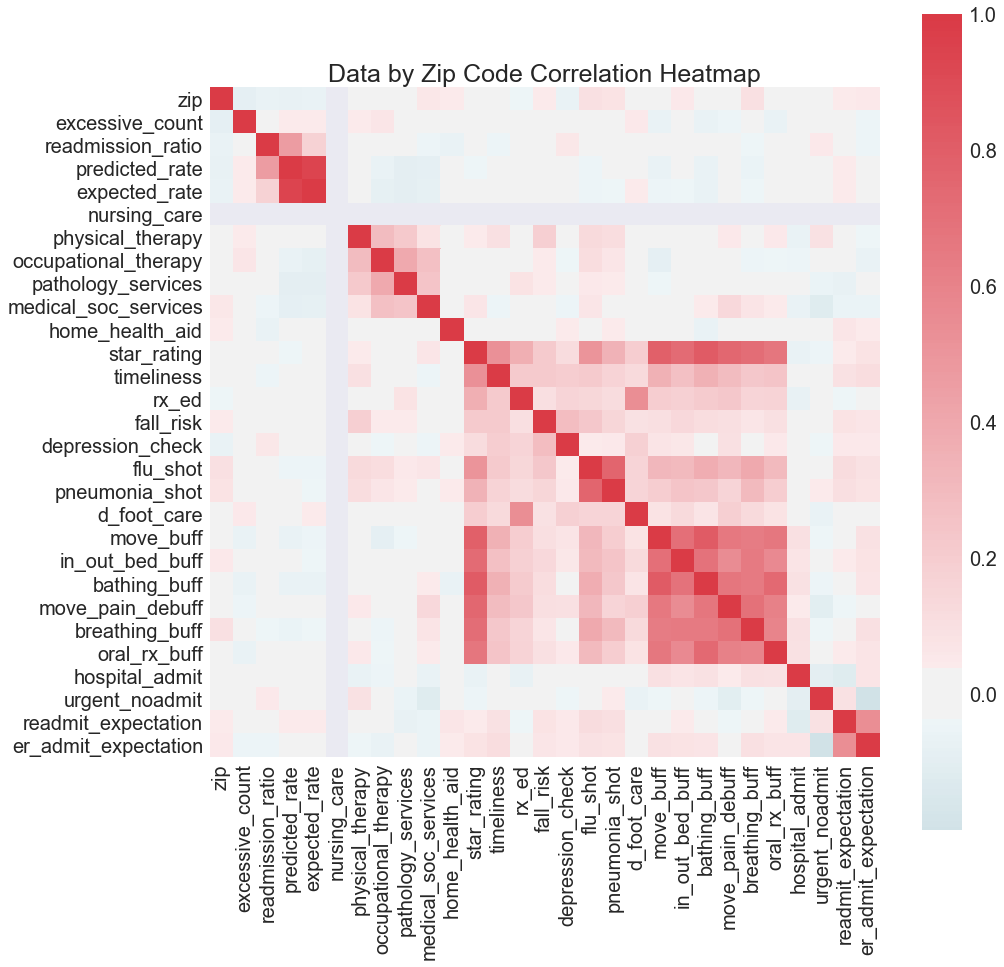

In [19]:
# Create Correlation Matrix to See Noteable Correlaitons
f, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            center=0,square=True, ax=ax)
plt.title('Data by Zip Code Correlation Heatmap')
_ = plt.rcParams.update(heatmap)
plt.show()

In [20]:
# Create Pearson Correlation Coefficient (PCC) Dataframe to Plot Star Ratings in Bar Chart
bar_corr = pd.DataFrame(corr.star_rating).reset_index()
bar_corr = bar_corr.loc[6:]
bar_corr = bar_corr.drop(bar_corr.index[5]).reset_index(drop=True)
bar_corr.columns = ['category','star_rating_coeff']

# Reset Plot Font Settings
_ = plt.rcParams.update(inline_rc)

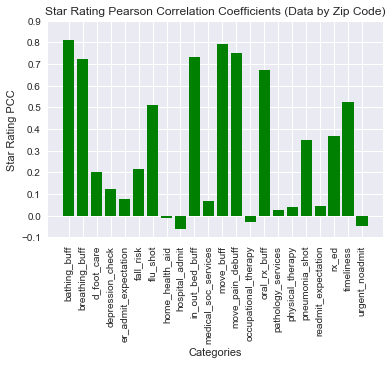

In [22]:
# Plot PCC Bar Chart for Star Rating by Zip Code
# Generate Ticks to Use in Plot
ticks = [x/10 for x in range(-1,10,1)]

#Plot Bar Plot
plt.bar(bar_corr['category'], bar_corr['star_rating_coeff'], color='g')
_ = plt.xticks(rotation = 90)
_ = plt.xlabel('Categories')
_ = plt.ylabel('Star Rating PCC')
_ = plt.title('Star Rating Pearson Correlation Coefficients (Data by Zip Code)')
_ = plt.yticks(ticks)
plt.show()

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In reviewing the heatmap, it appears as though there are very weak relationships with the data and readmission ratio.  I believe it would be best to scale the data in order to better view how the variance in the data actually effects readmission ratio.

In [24]:
test = ols('readmission_ratio ~ breathing_buff',df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:      readmission_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.212
Date:                Tue, 12 Jun 2018   Prob (F-statistic):              0.271
Time:                        19:23:38   Log-Likelihood:                 1177.1
No. Observations:                 820   AIC:                            -2350.
Df Residuals:                     818   BIC:                            -2341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0153      0.012     83.

In [25]:
test = ols('readmission_ratio ~ star_rating',df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:      readmission_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3883
Date:                Tue, 12 Jun 2018   Prob (F-statistic):              0.533
Time:                        19:23:40   Log-Likelihood:                 1176.7
No. Observations:                 820   AIC:                            -2349.
Df Residuals:                     818   BIC:                            -2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0082      0.010    100.712      

In [26]:
test = ols('readmission_ratio ~ pneumonia_shot',df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:      readmission_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05805
Date:                Tue, 12 Jun 2018   Prob (F-statistic):              0.810
Time:                        19:23:40   Log-Likelihood:                 1176.6
No. Observations:                 820   AIC:                            -2349.
Df Residuals:                     818   BIC:                            -2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9985      0.015     68.

In [27]:
test = ols('readmission_ratio ~ move_buff',df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:      readmission_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004250
Date:                Tue, 12 Jun 2018   Prob (F-statistic):              0.948
Time:                        19:23:40   Log-Likelihood:                 1176.5
No. Observations:                 820   AIC:                            -2349.
Df Residuals:                     818   BIC:                            -2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0031      0.017     59.718      0.0

In [28]:
test = ols('readmission_ratio ~ move_buff + flu_shot + star_rating + pneumonia_shot + breathing_buff',
           df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:      readmission_ratio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7395
Date:                Tue, 12 Jun 2018   Prob (F-statistic):              0.594
Time:                        19:23:40   Log-Likelihood:                 1178.4
No. Observations:                 820   AIC:                            -2345.
Df Residuals:                     814   BIC:                            -2317.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9981      0.023     42.

After running multiple Ordinary Least Squares models, it appears that the features count for a tenth of a percent or less of the changes with the readmission ratio.  Furthermore, the P score indicates a > 10% chance of error.  As such, OLS appears to confirm a lack of correlation between HHC quality and Hospital Readmission Ratios.<br>
***
Let's try applying the Standard Scaler to the data to see it's output.

In [29]:
# Removing identifiers from dataframe to create a values only dataframe.
col = list(df)
nums = df.drop(['zip','state'], axis=1)

In [30]:
# Use Scikit-learn's Standard Scaler to scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = nums.values
x_ss = ss.fit_transform(x)
df_ss = pd.DataFrame(x_ss)
df_ss.columns=col[2:]
df_ss.head()

,excessive_count,readmission_ratio,predicted_rate,expected_rate,nursing_care,physical_therapy,occupational_therapy,pathology_services,medical_soc_services,home_health_aid,...,move_buff,in_out_bed_buff,bathing_buff,move_pain_debuff,breathing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,readmit_expectation,er_admit_expectation
0,0.709088,0.795441,0.222323,0.049799,0.0,0.056169,0.207537,0.262542,0.341934,0.183049,...,0.546611,-0.020680,0.442280,0.724741,0.588399,0.417338,0.287009,-0.778097,-1.029112,0.717424
1,0.136792,-1.010622,-0.320011,-0.013081,0.0,0.056169,0.207537,0.262542,0.341934,0.183049,...,0.932769,0.297632,0.442280,0.196376,0.405743,0.753553,-0.401782,0.645636,-1.029112,-0.855537
2,-0.435503,0.414897,-0.287574,-0.393286,0.0,0.056169,0.207537,0.262542,0.341934,0.183049,...,-0.003372,-0.113094,-0.282160,-0.297901,0.140062,-0.161699,0.746203,0.265974,-1.029112,-0.855537
3,-0.149355,0.720738,-0.044303,-0.415221,0.0,0.056169,0.207537,0.262542,0.341934,0.183049,...,0.394488,0.954794,-0.523641,-0.050762,0.426499,0.370641,-0.139386,-0.778097,0.575207,0.717424
4,-0.435503,-1.046369,-0.205835,0.190182,0.0,0.056169,0.207537,0.262542,0.341934,0.183049,...,-0.202302,0.194951,-0.303159,0.204898,-0.391301,-0.609986,-1.549767,-0.430074,0.575207,0.717424


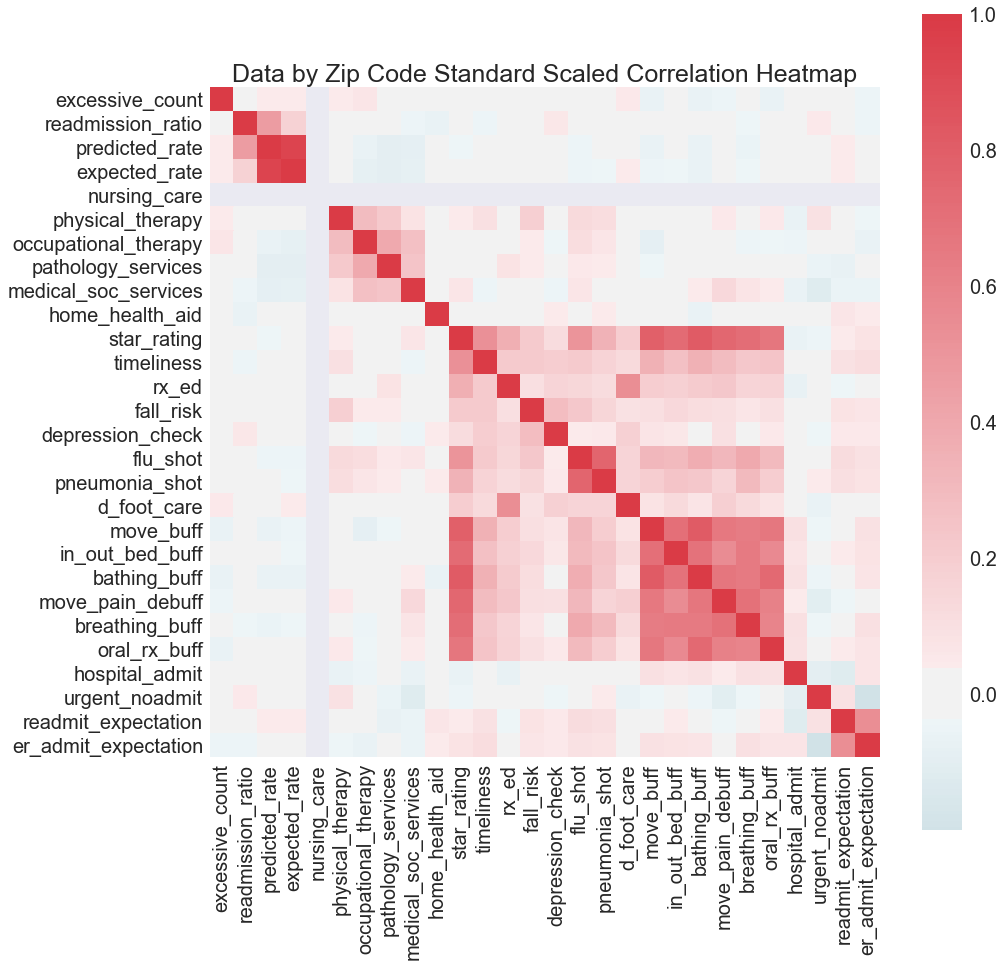

In [34]:
# Create Correlation Matrix to See Noteable Correlaitons from Scaled Data
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ss.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            center=0,square=True, ax=ax)
plt.title('Data by Zip Code Standard Scaled Correlation Heatmap')
plt.rcParams.update(heatmap)
plt.show()

In [35]:
# Create Correlation Dataframe to Plot Scaled Readmission Ratio PCC Ratings in Bar Chart
bar_corr = pd.DataFrame(corr.readmission_ratio).reset_index()
bar_corr = bar_corr.drop(bar_corr.index[1:5]).reset_index(drop=True)
bar_corr.columns = ['category','readmission_ratio_coeff']

# Reset to Plot Default Settings
_ = plt.rcParams.update(inline_rc)

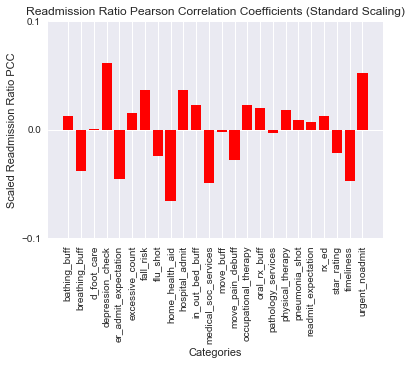

In [37]:
# Plot PCC Bar Chart for Standard Scaled Readmission Ratio
# Generate Ticks to Use in Plot
ticks = [x/10 for x in range(-1,2,1)]

#Plot Bar Plot
plt.bar(bar_corr['category'], bar_corr['readmission_ratio_coeff'], color='r')
_ = plt.xticks(rotation = 90)
_ = plt.xlabel('Categories')
_ = plt.ylabel('Scaled Readmission Ratio PCC')
_ = plt.title('Readmission Ratio Pearson Correlation Coefficients (Standard Scaling)')
_ = plt.yticks(ticks)
plt.show()

Still no significant correlations within the data.  Let's try using Scikit-Learn's Normalizer.

In [38]:
# Normalize Data 
from sklearn.preprocessing import Normalizer
norm = Normalizer()
x = nums.values
x_norm = norm.fit_transform(x)
df_norm = pd.DataFrame(x_norm)
df_norm.columns=col[2:]
df_norm.head()

,excessive_count,readmission_ratio,predicted_rate,expected_rate,nursing_care,physical_therapy,occupational_therapy,pathology_services,medical_soc_services,home_health_aid,...,move_buff,in_out_bed_buff,bathing_buff,move_pain_debuff,breathing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,readmit_expectation,er_admit_expectation
0,0.018973,0.003314,0.052048,0.050467,0.003162,0.003162,0.003162,0.003162,0.003162,0.003162,...,0.238423,0.214391,0.246328,0.258977,0.250123,0.203007,0.054072,0.033518,0.003162,0.006324
1,0.012926,0.003050,0.048690,0.051113,0.003232,0.003232,0.003232,0.003232,0.003232,0.003232,...,0.254328,0.229122,0.251743,0.244633,0.248511,0.219104,0.048474,0.048797,0.003232,0.003232
2,0.006807,0.003492,0.051567,0.050886,0.003404,0.003404,0.003404,0.003404,0.003404,0.003404,...,0.240645,0.227710,0.241666,0.237922,0.250856,0.197417,0.062969,0.047312,0.003404,0.003404
3,0.010194,0.003546,0.053606,0.050633,0.003398,0.003398,0.003398,0.003398,0.003398,0.003398,...,0.251804,0.262678,0.233454,0.247386,0.262168,0.216463,0.053691,0.036021,0.006796,0.006796
4,0.006575,0.003096,0.050494,0.053518,0.003287,0.003287,0.003287,0.003287,0.003287,0.003287,...,0.226829,0.229788,0.232746,0.249183,0.221240,0.174888,0.037805,0.038462,0.006575,0.006575


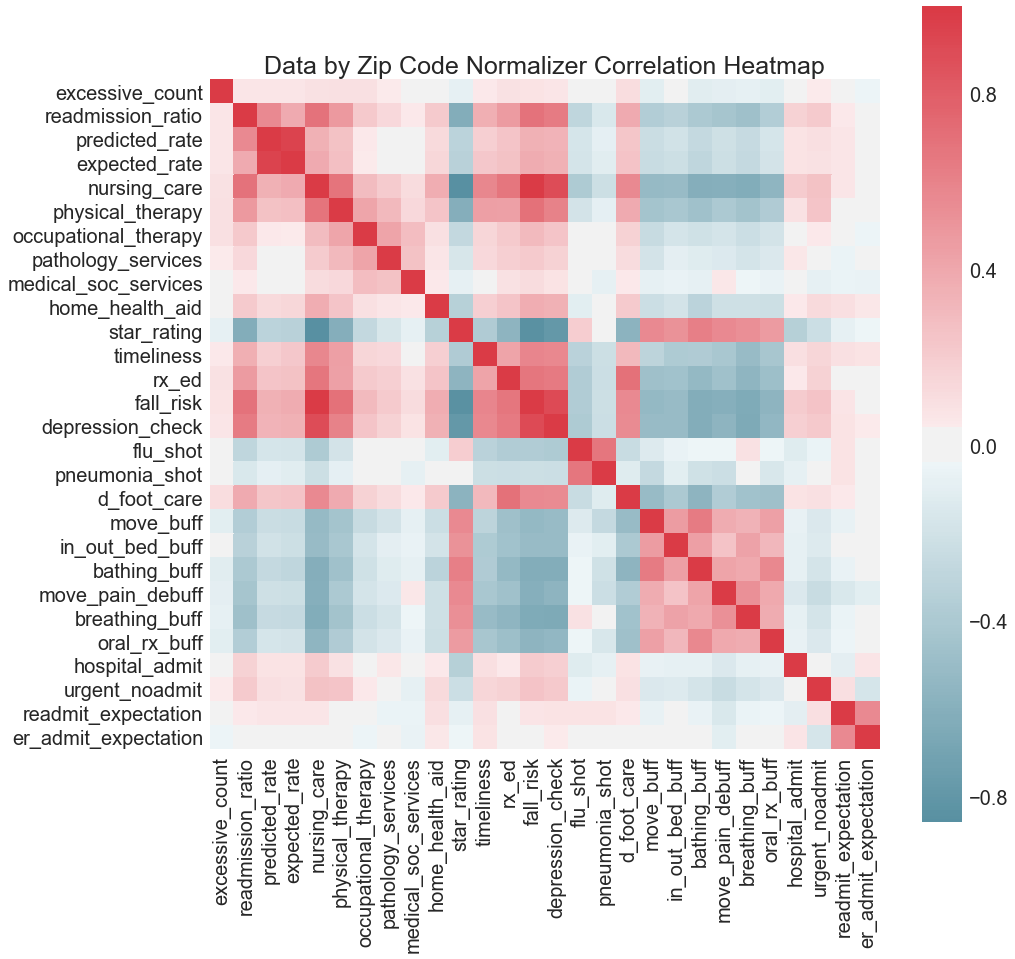

In [42]:
# Create Correlation Matrix to See Noteable Correlaitons
f, ax = plt.subplots(figsize=(15, 15))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            center=0,square=True, ax=ax)
plt.title('Data by Zip Code Normalizer Correlation Heatmap')
_ = plt.rcParams.update(heatmap)
plt.show()

In [43]:
# Create Correlation Dataframe to Plot Scaled Readmission Ratio PCC Ratings in Bar Chart
bar_corr = pd.DataFrame(corr.readmission_ratio).reset_index()
bar_corr = bar_corr.drop(bar_corr.index[1:5]).reset_index(drop=True)
bar_corr.columns = ['category','readmission_ratio_coeff']

# Reset to Plot Default Settings
_ = plt.rcParams.update(inline_rc)

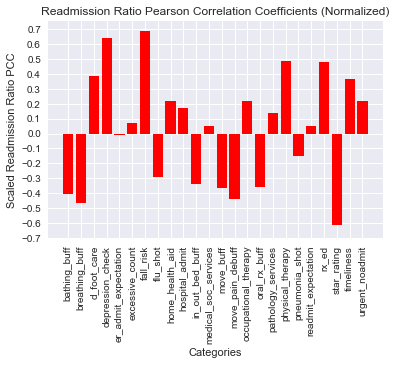

In [44]:
# Plot PCC Bar Chart for Normalized Readmission Ratio
# Generate Ticks to Use in Plot
ticks = [x/10 for x in range(-7,8,1)]

#Plot Bar Plot
plt.bar(bar_corr['category'], bar_corr['readmission_ratio_coeff'], color='r')
_ = plt.xticks(rotation = 90)
_ = plt.xlabel('Categories')
_ = plt.ylabel('Scaled Readmission Ratio PCC')
_ = plt.title('Readmission Ratio Pearson Correlation Coefficients (Normalized)')
_ = plt.yticks(ticks)
plt.show()

There is a lot to unpack with this heatmap!  Unlike my in original EDA it appears star rating has a strong negative correlation to reamission ratios!  Furthmore, all ratings that appear to negatively correlate to star rating also negatively correlate to readmission ratio.  Surprisingly, that includes timliness, depression checks, fall risk assessments, and additional services provided by some HHC agencies.  <br><br>
Unlike my initial EDA, it appears as though improvements to independence like movement, ability to take oral meds, and decreases to pain also negatively correlate to readmission ratio.  <br>

***
Now that we've found some interesting correlations, let's plot them!


In [45]:
def line_reg(x,y,data,reg=True):
    """This function plots the linear regression of two dataframe columns and adds the pearson
    correlation coefficient to the chart."""
    # Initializing Text Axes
    f=plt.figure()
    ax = f.add_subplot(111)
    
    # Plots Initial Scatter Plot
    _ = sns.regplot(x=x, y=y, data =data, fit_reg=reg)
    
    # Add Pearson Correlation Coeffecient to the Plot
    plt.margins(.02)
    core_mat = np.corrcoef(data[x],data[y])
    pcore = core_mat[0,1]
    text = 'p: %s\n'%(round(pcore,2))
    _ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)

In [46]:
# Make Plots Standard
sns.set()

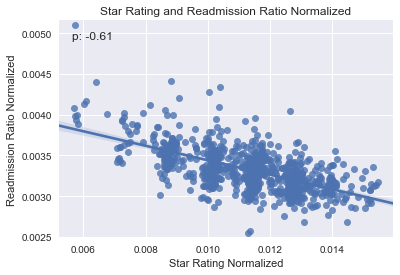

In [47]:
# Plotting Scatter Plot of Star Rating and Readmission Ratios
_ = line_reg('star_rating','readmission_ratio',df_norm)
_ = plt.xlabel('Star Rating Normalized')
_ = plt.ylabel('Readmission Ratio Normalized')
_ = plt.title('Star Rating and Readmission Ratio Normalized')
plt.show()

Most patient improvement ratings like improved breathing and decreased movement pain appear fairly similar.  As such, I will only plot one, in this case decreased movement pain, to give an example of the patient improvement ratings.

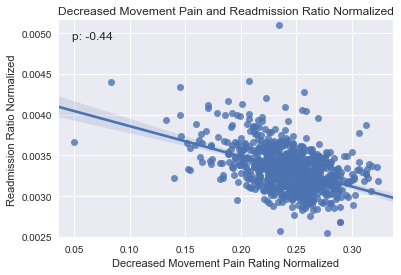

In [48]:
# Plotting Scatter Plot of Decreased Movement Pain and Readmission Ratios
_ = line_reg('move_pain_debuff','readmission_ratio',df_norm)
_ = plt.xlabel('Decreased Movement Pain Rating Normalized')
_ = plt.ylabel('Readmission Ratio Normalized')
_ = plt.title('Decreased Movement Pain and Readmission Ratio Normalized')
plt.show()



Flu shot and pneumonia shot also appear to maintain their negative correlation to readmission ratio as we found in our first EDA.  Plotting flu shot rating as a representative of these two ratings.

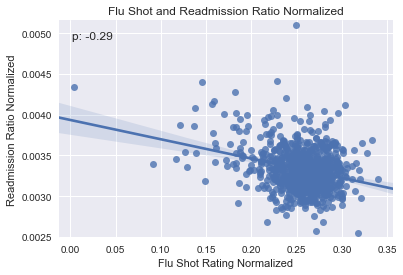

In [49]:
# Plotting Scatter Plot of Flu Shot Rating and Readmission Ratios
_ = line_reg('flu_shot','readmission_ratio',df_norm)
_ = plt.xlabel('Flu Shot Rating Normalized')
_ = plt.ylabel('Readmission Ratio Normalized')
_ = plt.title('Flu Shot and Readmission Ratio Normalized')
plt.show()

Similar to patient improvement ratings nursing check ratings like Rx education and fall risk assessment appear fairly similar as well.  Plotting Rx education to represent this group of measures.

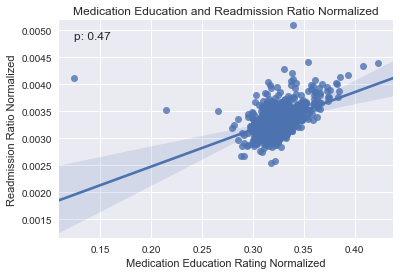

In [50]:
# Plotting Scatter Plot of Medication Education and Readmission Ratios
_ = line_reg('rx_ed','readmission_ratio',df_norm)
_ = plt.xlabel('Medication Education Rating Normalized')
_ = plt.ylabel('Readmission Ratio Normalized')
_ = plt.title('Medication Education and Readmission Ratio Normalized')
plt.show()


Additional services like offering occupational therapy or medical social services also appear to positively correlate with Readmission Ratios.  I will plot the availability of occupational therapy as a representative of this group as it's correlation appears to be the mean correlation of this group of measures.<br><br>
**Please Note:** Nursing Care will not be taken into consideration for this analysis as all observations reported this service as true.

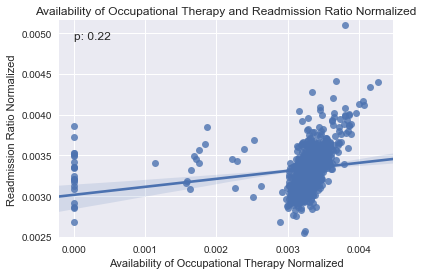

In [51]:
# Plotting Scatter Plot of Occupational Therapy Services and Readmission Ratios
_ = line_reg('occupational_therapy','readmission_ratio',df_norm)
_ = plt.xlabel('Availability of Occupational Therapy Normalized')
_ = plt.ylabel('Readmission Ratio Normalized')
_ = plt.title('Availability of Occupational Therapy and Readmission Ratio Normalized')
plt.show()

Upon further reflection, I am not satisfied with using the Normalizer model.  The model normalizes the data by observation and not by feature.  As such, despite finding some stronger correlations, I do not believe these relationships will provide any practical value when trying to solve the problem of reducing readmission ratios.  It is possible I may need even more observations to better observe the relationships within the data.